# Trabajo Practico Final - Probabilidad Aplicada
### Profesora: Chan, Debora 
### Alumno: Mermoz, Daniel Alberto

In [1]:
#Carga de librerias
import numpy as np
import pandas as pd
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Carga la base de Datos 
df= pd.read_excel('D:\\Relevamiento Alumnos 2018.xlsx')
#df= pd.read_excel('https://bit.ly/FinalMermozCSV')
rows = len(df)
columns = df.columns.size#len(df[0])-1
print('\nHay un total de ',rows,' datos en ',columns,' columnas cargados correctamente')




Hay un total de  105  datos en  23  columnas cargados correctamente


In [3]:

cantM = len(df[df.GeneroCAT == 'Masculino'])
cantF = len(df[df.GeneroCAT == 'Femenino'])
porcM = round(cantM/rows*100,2)
porcF = round(cantF/rows*100,2)
print('Cantidad de Hombres: ',cantM,'\tPorcentaje: ',porcM)
print('Cantidad de Mujeres: ',cantF,'\tPorcentaje: ',porcF)

Cantidad de Hombres:  82 	Porcentaje:  78.1
Cantidad de Mujeres:  23 	Porcentaje:  21.9


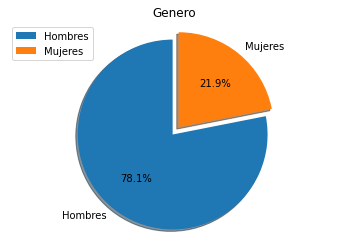

In [4]:
genero = 'Hombres', 'Mujeres'
#Declaramos el tamaño de cada 'rebanada' y en sumatoria todos deben dar al 100%
porcM = round(cantM/rows*100,2)
porcF = round(cantF/rows*100,2)
sizes = [porcM, porcF]
#En este punto señalamos que posicion debe 'resaltarse' y el valor, si se coloca 0, se omite
explode = (0.1, 0)  
 
fig1, ax1 = plt.subplots()
#Creamos el grafico, añadiendo los valores
ax1.pie(sizes, explode=explode, labels=genero, autopct='%1.1f%%',
        shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax1.axis('equal')
plt.title("Genero")
plt.legend()
plt.savefig('grafica_pastel.png')
plt.show()